<h1>Исследование работы интернет-магазина "Стримчик"</h1>

# План
## Изучение данных
## Предобработка
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы;
* Обработайте пропуски при необходимости;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
## Исследовательский анализ данных
* Посмотрите, сколько игр выпускалось в разные годы.
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
* Возьмите данные за соответствующий актуальный период. Не учитывайте в работе данные за предыдущие годы.
* Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
* Посмотрите на общее распределение игр по жанрам. 
## Портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). 
* Самые популярные жанры (топ-5). 
## Проверка гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
## Общий вывод


# Изучение данных

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
data = pd.read_csv('/datasets/games.csv')

In [ ]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


При предварительном просмотре данных были обнаружены разные регистры в названиях колонок, которые нужно привести к общему виду. Также имеются некорректные типы данных. В столбцах rating, user_score, critic_score есть пропущенные значения.

# Предобработка данных

In [ ]:
data.columns = data.columns.str.lower() # приводим названия столбцов к нижнему регистру

In [ ]:
data.dropna(subset=['name','genre'], inplace=True) #уберем строки с отсутствием имени и жанра

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['rating'] = data['rating'].fillna('unknown')

Аббривиатура tbd означает to be determined, то есть значение еще не опеределено. Такие игры сложно анализировать, так как слишком большой части нет, поэтому заменим эти значения на NaN.

In [ ]:
tbd = data['user_score'] != 'tbd'
data['user_score'].where(tbd, np.nan, inplace=True)
data['user_score'] = data['user_score'].astype('float64')

В данном случае изменим тип данных с столбце года релиза на целочисленный, так как год не может быть дробным значением. Пропуски в этом столбце заменим нулями.

In [ ]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

In [ ]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 

In [ ]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,unknown,0.01


В столбце total_sales теперь хранять общие суммы продаж всех регионов по каждой игре.

In [ ]:
data.duplicated().sum()

0

После предобработки данных все пропуски, которые можно было заполнить - заполнены. Дубликаты в датафрейме отсутствуют. Названия столбцов приведены к нижнему регистру. Типы данных для дальнейших расчетов преобразованы.

# Исследовательский анализ данных

**Посмотрим сколько игр выпускалось в разные годы**

In [1]:
data['year_of_release'].value_counts()
data.hist('year_of_release', range=(1980,2008))

NameError: ignored

По графику видно, что с каждым годом выпускалось все больше игр и в 2008 году количество релизов максимальное. Данные за все переоды не так важны, так как главные показатели интереснее изучать с 1995 года и новее.

**Посмотрим продажи по платформам**

In [ ]:
data['platform'].value_counts()

In [ ]:
data['platform'].value_counts()
#sns.barplot(x='platform', y='total_sales', data=data)

sales_plot = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
sales_plot.plot(kind='bar',figsize=(10,10))

#for platform, group_data in data.groupby('platform'):
    #group_data.plot(x='year_of_release',y='total_sales', title=platform, kind='hist',bins=30)

**Построим отдельные графики для наиболее распространенных платформ**

In [ ]:
data_pivot = data.query('platform == "PS2" and year_of_release >= 1995').pivot_table(index = 'year_of_release', 
                                                            values = 'total_sales') 
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(data_pivot)
plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.title("PS2")

In [ ]:
data_pivot = data.query('platform == "DS" and year_of_release >= 1995').pivot_table(index = 'year_of_release', 
                                                            values = 'total_sales') 
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(data_pivot)
plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.title("DS")

In [ ]:
data_pivot = data.query('platform == "PS3" and year_of_release >= 1995').pivot_table(index = 'year_of_release', 
                                                            values = 'total_sales') 
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(data_pivot)
plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.title("PS3")

In [ ]:
data_pivot = data.query('platform == "Wii" and year_of_release >= 1995').pivot_table(index = 'year_of_release', 
                                                            values = 'total_sales') 
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(data_pivot)
plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.title("Wii")

In [ ]:
data_pivot = data.query('platform == "X360" and year_of_release >= 1995').pivot_table(index = 'year_of_release', 
                                                            values = 'total_sales') 
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(data_pivot)
plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.title("X360")

In [ ]:
data_pivot = data.query('platform == "PSP" and year_of_release >= 1995').pivot_table(index = 'year_of_release', 
                                                            values = 'total_sales') 
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(data_pivot)
plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.title("PSP")

In [ ]:
data_pivot = data.query('platform == "PS" and year_of_release >= 1995').pivot_table(index = 'year_of_release', 
                                                            values = 'total_sales') 
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(data_pivot)
plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.title("PS")

In [ ]:
data_pivot = data.query('platform == "XB" and year_of_release >= 1995').pivot_table(index = 'year_of_release', 
                                                            values = 'total_sales') 
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(data_pivot)
plt.xlabel("year_of_release")
plt.ylabel("total_sales")
plt.title("XB")

Можно отметить, что каждая платформа появляется и исчезает за срок равный примерно 6 лет. Но время актуальности у разных платформ сильно отличается. Например, PS2 была актуальна с 2001 по 2006, но в связи с выходом PS3 стала утрачивать свою актуальность. PS3 оставалась актуально в течение почти 10 лет, но после 2014 года достаточно резко стала терять позиции, вероятно, в связи с выходом следующей версии. Пик актуальности DS был в 2005 году, после этого платформой стали пользоваться все реже и реже, хотя в 2012 произошел небольшой всплеск активности. Пик актуальности Wii тоже остался в 2005 году. Точно такая же ситуация с PSP. 
На основании этих графиков актуальный период для прогноза 2017 год можно выделить годы с 2005 по 2016.

**Уберем из исследования неактуальную информацию и будем далее работать с данными после 2013 года**

In [ ]:
actual_data = data.query('year_of_release >= 2013')
actual_data

# Определим тенденции продаж лидирующих платформ

[Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Продажи, $ млн.'),
 Text(0.5, 1.0, 'Продажи каждой платформы по годам')]

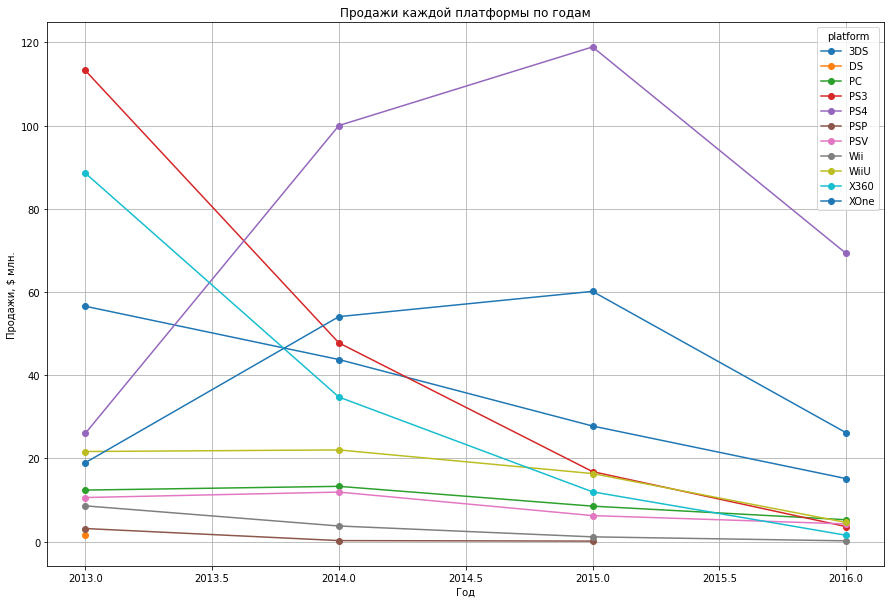

In [ ]:
actual_data.pivot_table(index='year_of_release', 
                        columns='platform', 
                        values='total_sales', 
                        aggfunc='sum').plot(style='o-', 
                                            grid= True, 
                                            legend=True, 
                                            figsize=(15,10)).set(xlabel='Год', 
                                                                 ylabel='Продажи, $ млн.', 
                                                                 title='Продажи каждой платформы по годам')

Теперь здесь отображены продажи по каждой платформе за последние 3 года. На графике хорошо видно все тенденции. В восходящем тренде находятся только платформы PS4, XOne.

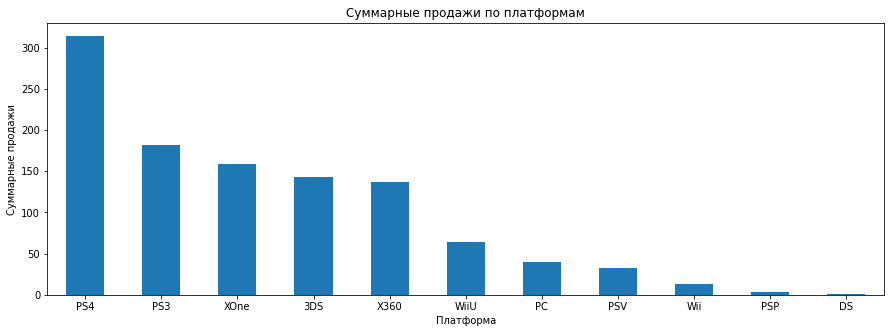

In [ ]:
actual_data.groupby('platform')['total_sales'].sum()\
    .sort_values(ascending = False)\
    .plot(kind = 'bar', figsize = (15,5),
         xlabel = "Платформа",
         ylabel = "Суммарные продажи",
         title = "Суммарные продажи по платформам")
plt.xticks(rotation = 0)
plt.show()

На основании анализа построенных графиков и полученных данных ТОП-5 потенциально прибыльных платформ: 3DS, X360, PS4, PS3, XOne. 
Построим отдельную сводную таблицу с данными по ним:

# Сформируем отдельную таблицу для ТОП-5 платформ

In [ ]:
top5 = actual_data.query('platform in ["XOne","X360","PS4","PS3","3DS"]')

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

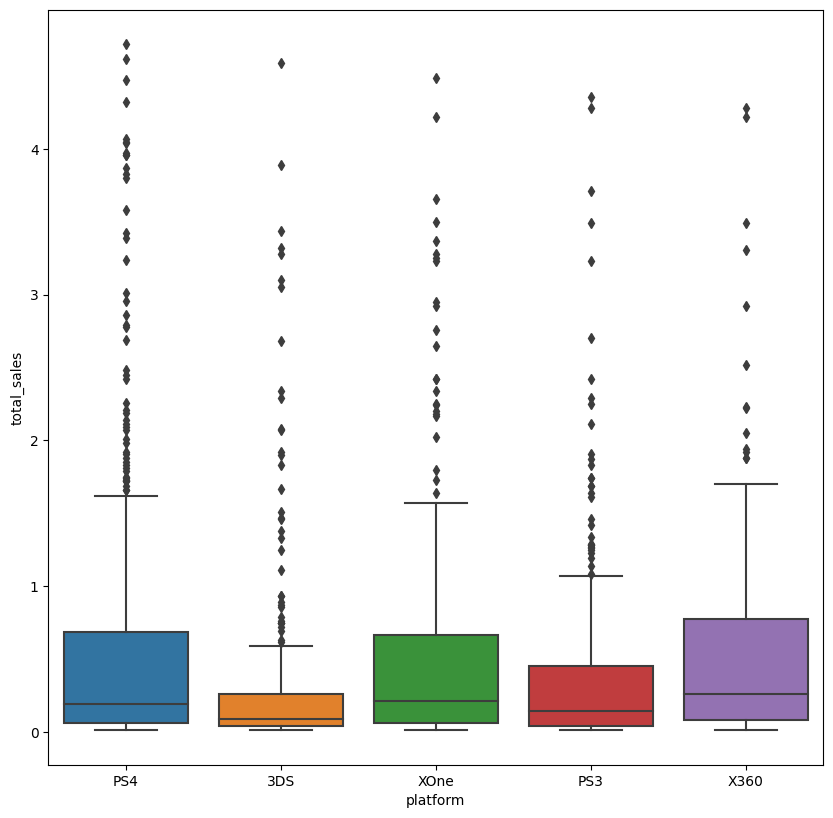

In [ ]:
top5_plot = top5.query('total_sales < 5')
fig,ax = plt.subplots(figsize=(10,10), dpi=100)

sns.boxplot(data=top5_plot, x="platform", y="total_sales", ax=ax)



In [ ]:
print(
    top5.pivot_table(index='platform',
    values='total_sales', 
    aggfunc=['mean','count'])\
        .sort_values(by=
    [('count','total_sales')], 
    ascending=False)
)

                mean       count
         total_sales total_sales
platform                        
PS4         0.801378         392
PS3         0.525884         345
3DS         0.472772         303
XOne        0.645020         247
X360        0.735484         186


По проведенным расчетам и построенным графикам можно сделать выводы, что наиболее прибыльной из всех является платформа PS3, наибольший разброс значений у платформы Wii, по количеству продаж она занимает второе место. Тройку самых прибыльных платформ замыкает X360. Посмотрим как вляют отзывы пользователей и критиков на продажи.   

<AxesSubplot:xlabel='critic_score', ylabel='user_score'>

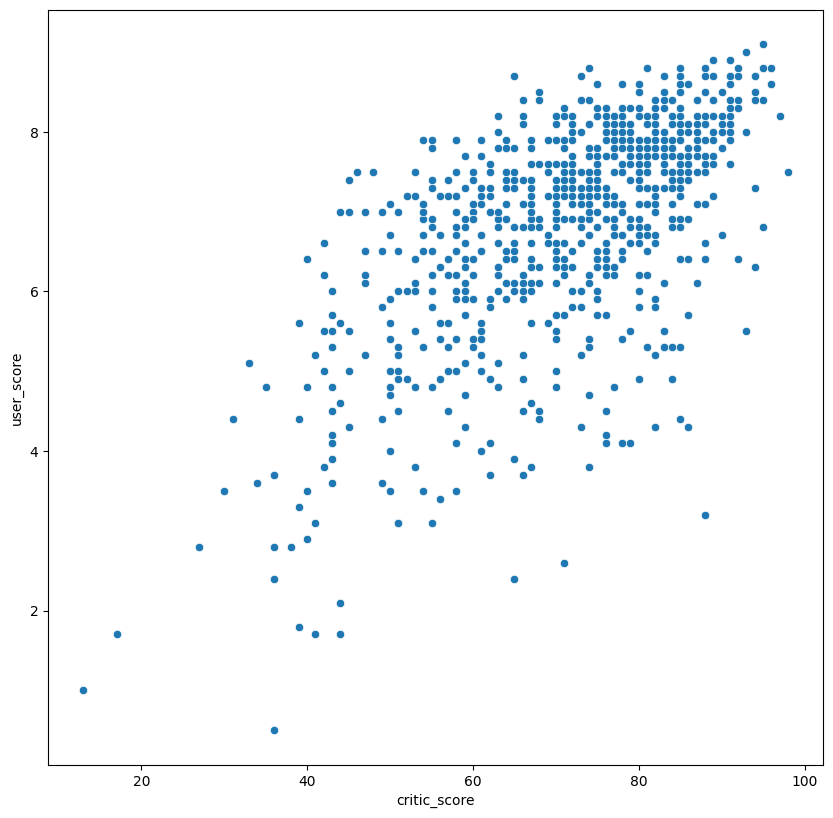

In [ ]:
PS3 = data.query('platform == "PS3"')
fig,ax = plt.subplots(figsize=(10,10),dpi=100) 
sns.scatterplot(
    x='critic_score', 
    y='user_score',
    data=PS3)

В целом мнение критиков и пользователей чаще совпадает, дальше лучше рассмотривать только мнение критиков, так как в данных разница минимальна, а значения более удобны. Посмотрим корреляцию между отзывами и продажами.

In [ ]:
top5['critic_score'] = top5['critic_score'].fillna(-1)
top5 = top5.query('critic_score > -1')
corr_list = ['user_score', 'critic_score', 'total_sales']
print('top 5', top5[corr_list].corr())


top 5               user_score  critic_score  total_sales
user_score      1.000000      0.545927    -0.013332
critic_score    0.545927      1.000000     0.360374
total_sales    -0.013332      0.360374     1.000000


/tmp/ipykernel_99/391899274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5['critic_score'] = top5['critic_score'].fillna(-1)


Как и ожидалось, при увеличении рейтинга продажы также растут.

# Проверим как влияют оценки на продажи в рамках двух самых популярных платформ

In [ ]:
ps4 = actual_data.query("platform == 'PS4'")
xone = actual_data.query("platform == 'XOne'")

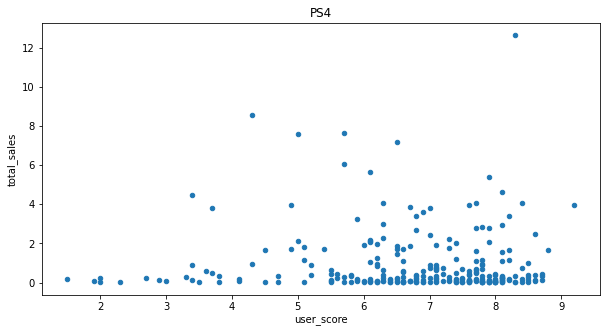

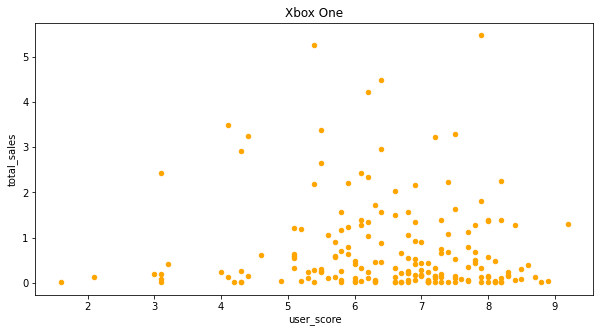

In [ ]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='user_score', y='total_sales', kind='scatter', title='Xbox One', color='orange')
plt.show()

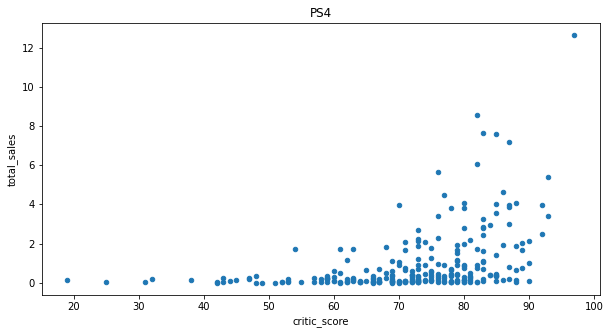

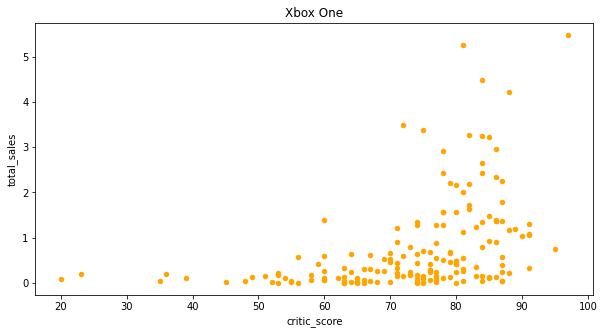

In [ ]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='critic_score', y='total_sales', kind='scatter', title='Xbox One', color='orange')
plt.show()

На основе полученных данных видно, что есть корреляция между отзывами критиков и продажами, связи между отзывами пользователей и продажами нет.
Чем выше оценка критиков, тем выше продажи, однако нельзя точно утверждать, что такая взаимосвязь будет стабильна, так как обнаруженная корреляция небольшая.

In [ ]:
top5['genre'].value_counts()

Action          224
Shooter         100
Sports           96
Role-Playing     78
Racing           48
Fighting         33
Platform         31
Misc             30
Adventure        29
Simulation       12
Strategy          9
Puzzle            4
Name: genre, dtype: int64

По жанрам игры распределены следующим образом: самым популярным жанром является Action, за ним Sports, Shooter, Misc, Role-playing. Самый редко встречающийся жанр - Puzzle.

<AxesSubplot:xlabel='total_sales', ylabel='genre'>

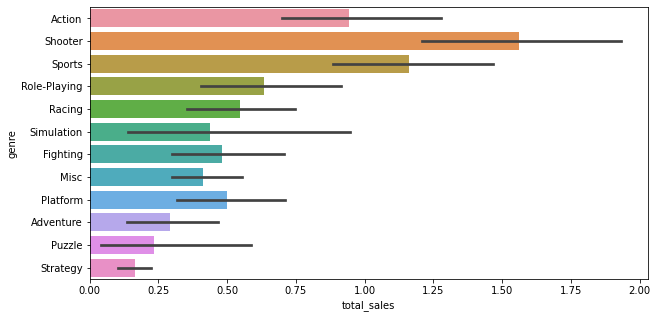

In [ ]:
sns.barplot(x = 'total_sales', y = 'genre', data = top5)

По данным продаж лидирует жанр Shooter, PLatform и Sports. В конце списка Stretegy и Adventure. Самый прибыльный жанр Shooter и Platform, они явно выделяются на фоне остальных. Видимо отстающего жанра нет.

# Портрет пользователя каждого региона

Проанализируем суммы продаж по регионам

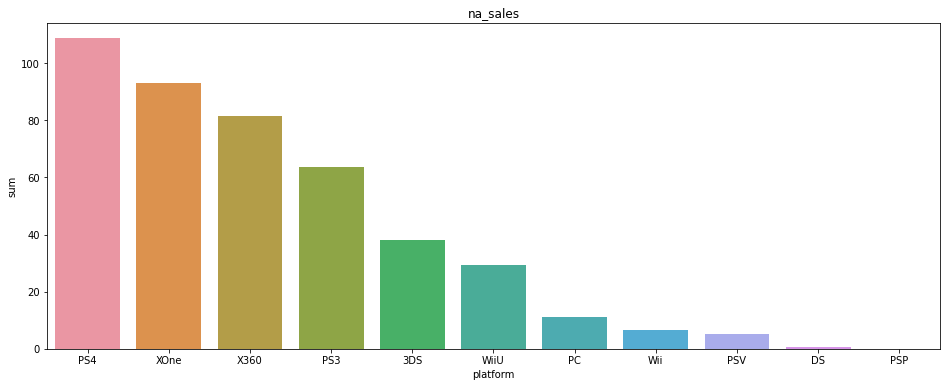

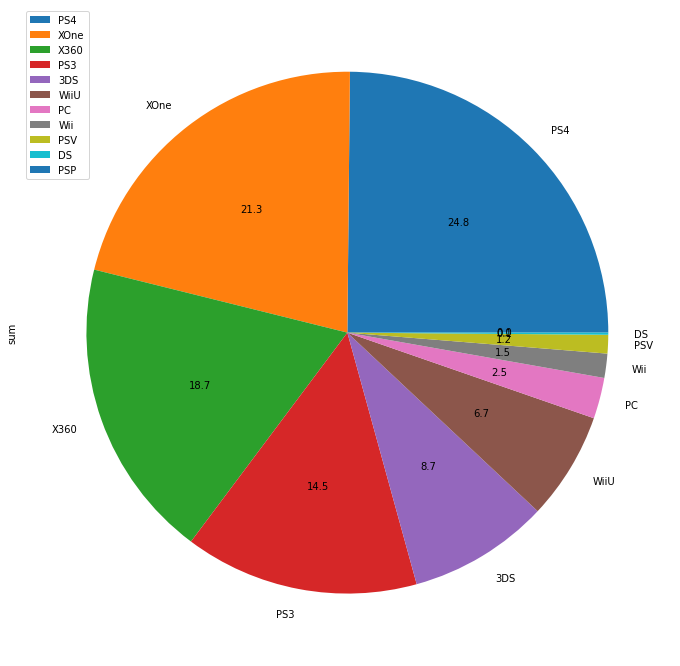

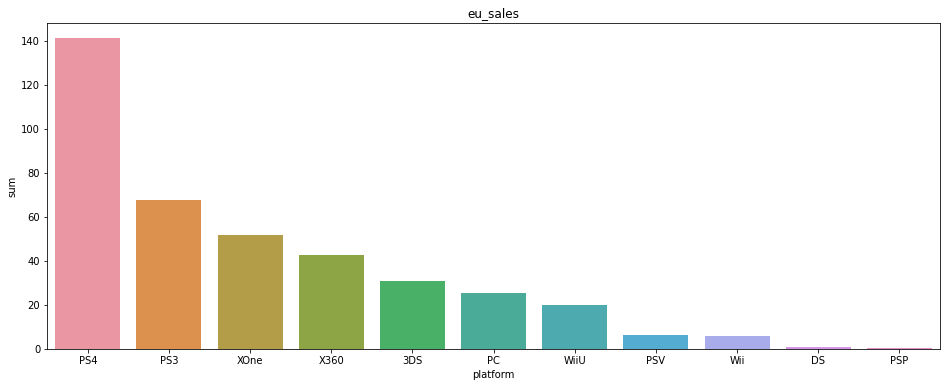

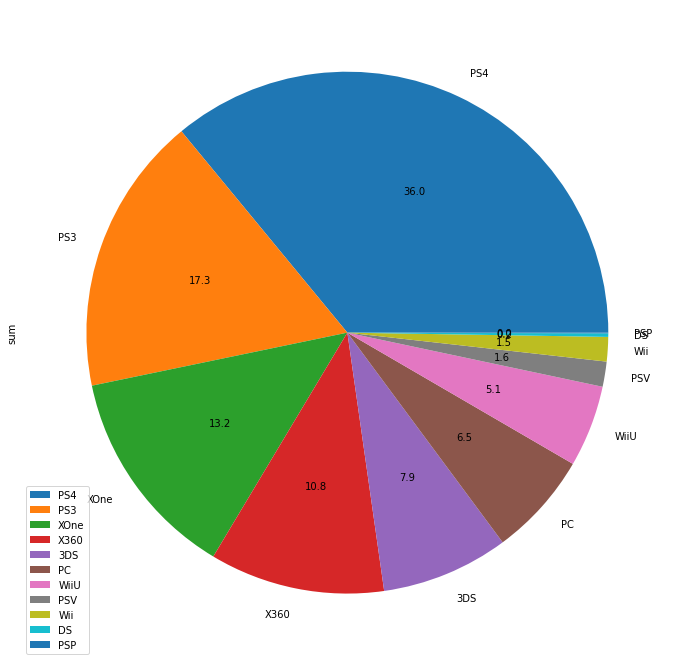

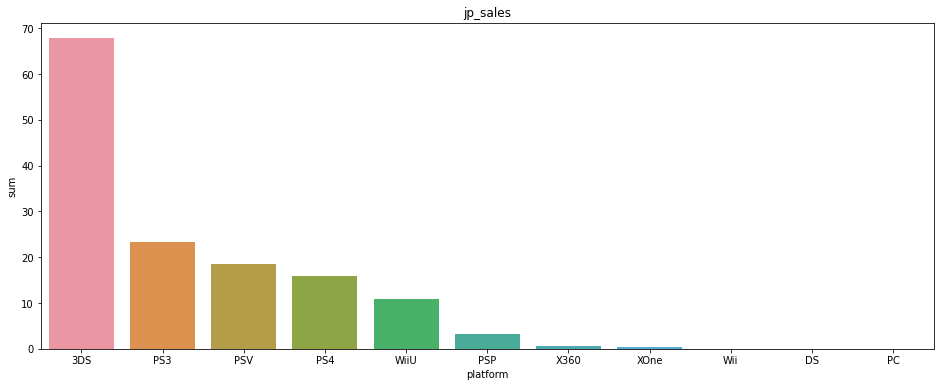

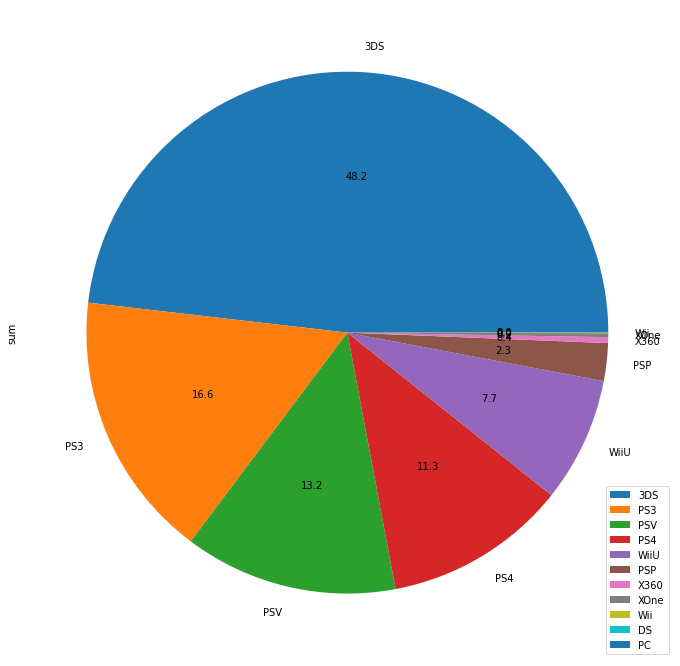

In [ ]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i in regions:
    platform_regions = (actual_data.pivot_table(index='platform', values=i, aggfunc=['sum', 'count'])
                                    .set_axis(['sum', 'count'], axis=1, inplace=False)
                                    .sort_values(by=('sum'), ascending=False)
                               )
    plt.figure(figsize=(16, 6))
    sns.barplot(x=platform_regions.index, y='sum', data=platform_regions)
    plt.title(i)
    plt.show()
    platform_regions.plot(kind='pie', y='sum', figsize=(12, 12), autopct = '%.1f')
    plt.show()    



В регионе NA топ 5 самых популярных платформ выглядит следующим образом: X360, XOne, PS4. В регионе EU топ 5 такой: PS4, PS3, XOne. Топ 5 региона JP выглядит так: 3DS, PS3, PSV.

Самые популярные платформы региона JP сильно отличаются от топа EU и NA.

Теперь проанализируем суммы продаж жанров по регионам

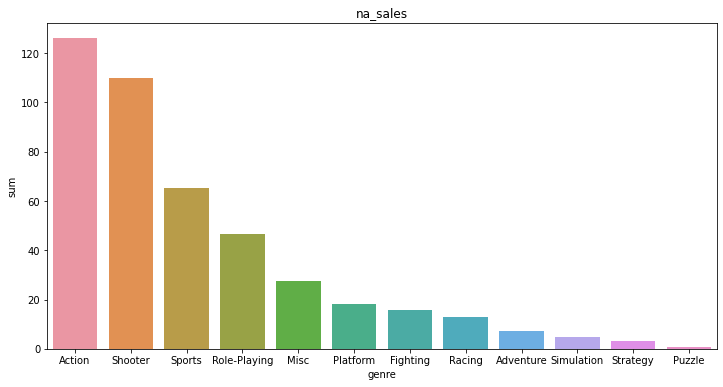

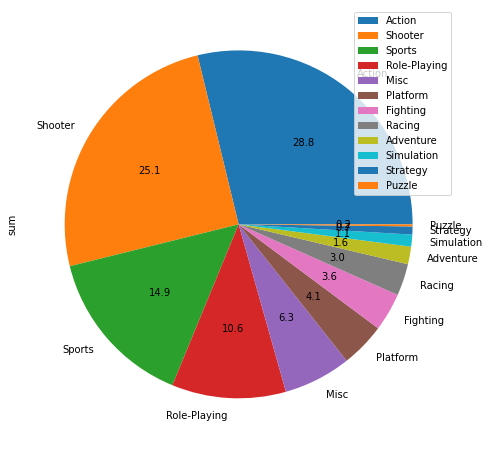

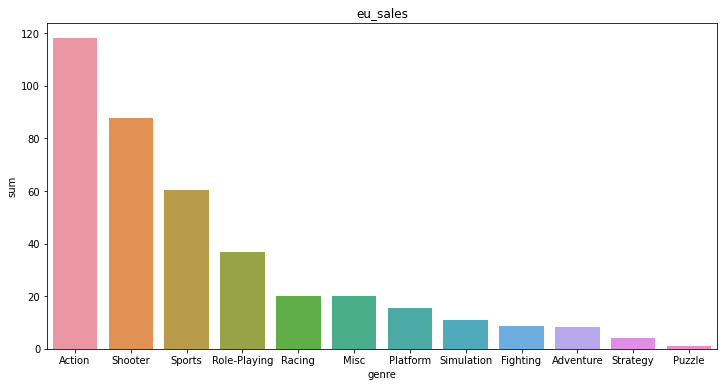

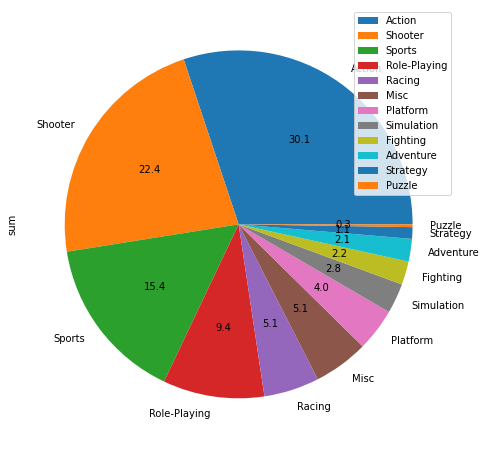

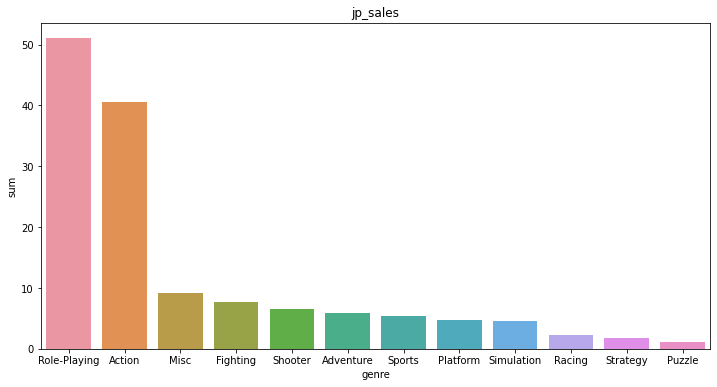

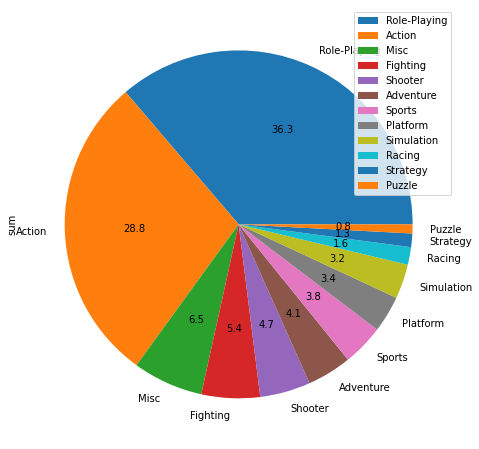

In [ ]:
for i in regions:
    genre_regions = (actual_data.pivot_table(index='genre', values=i, aggfunc=['sum', 'count'])
                                 .set_axis(['sum', 'count'], axis=1, inplace=False)
                                 .sort_values(by=('sum'), ascending=False)
                               )
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_regions.index, y='sum', data=genre_regions)
    plt.title(i)
    plt.show()
    genre_regions.plot(kind='pie', y='sum', figsize=(8, 8), autopct = '%.1f')
    plt.show()    


В регионе NA топ жанров: Action, Shooter, Sports. В регионе EU: Action, Shooter, Sports. В JP: Role-Playing, Action, Misc. В общем итоге во всех топах оказался только жанр Action.

В столбце rating представлена оценка игр ESRB, которая присваивает им категорию в зависимости от различных факторов. Категории: T, E, M, E10+, AO, EC, RP.  

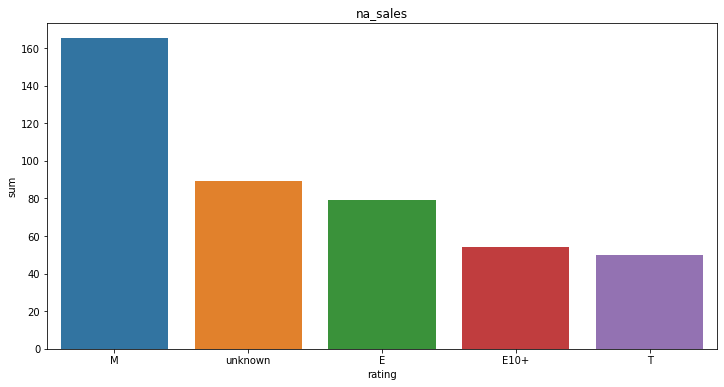

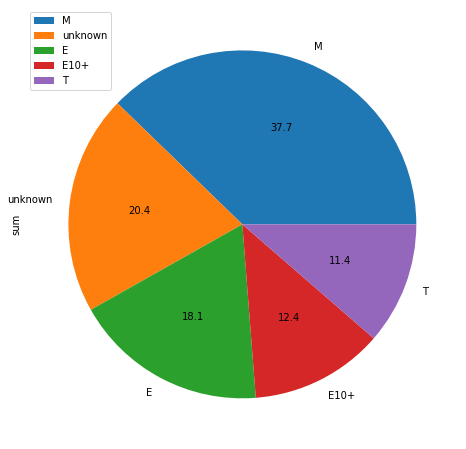

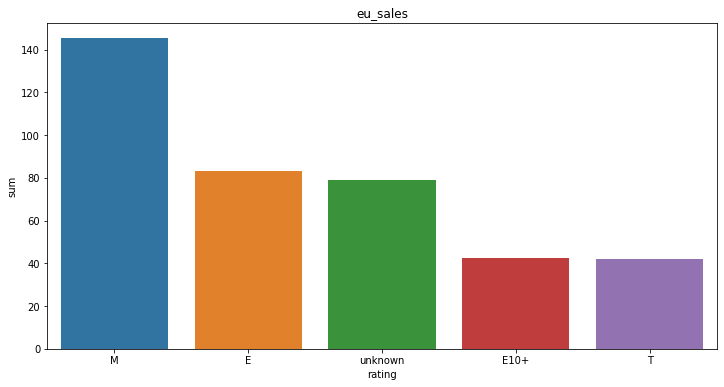

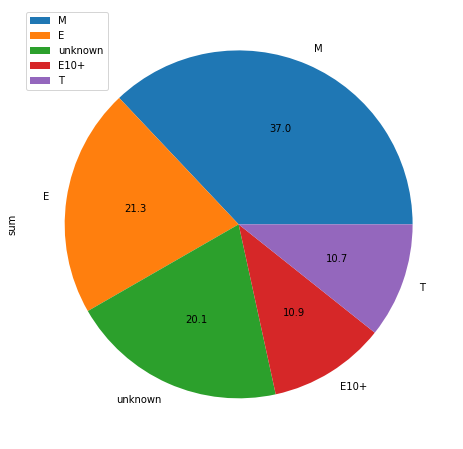

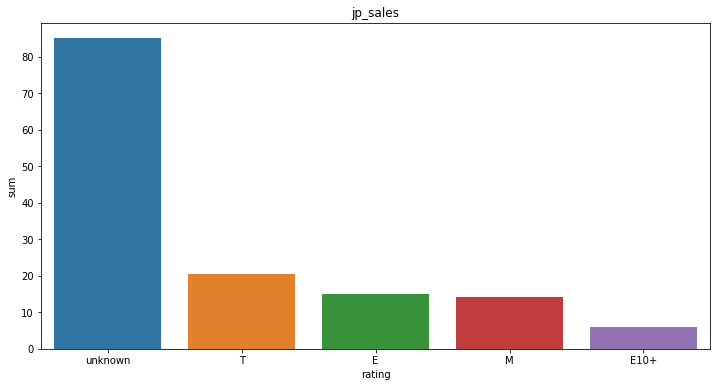

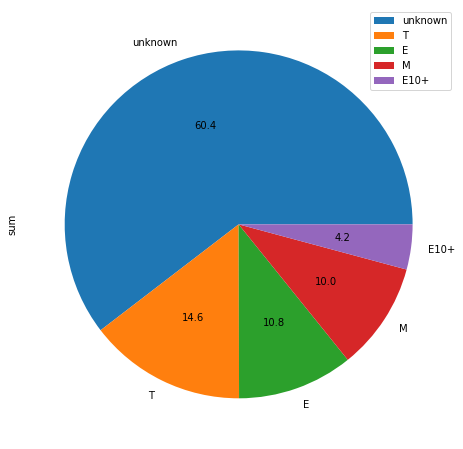

In [ ]:
for i in regions:
    rating_regions = (actual_data.pivot_table(index='rating', values=i, aggfunc=['sum', 'count'])
                                 .set_axis(['sum', 'count'], axis=1, inplace=False)
                                 .sort_values(by=('sum'), ascending=False)
                               )
    plt.figure(figsize=(12, 6))
    sns.barplot(x=rating_regions.index, y='sum', data=rating_regions)
    plt.title(i)
    plt.show()
    rating_regions.plot(kind='pie', y='sum', figsize=(8, 8), autopct = '%.1f')
    plt.show()    


Распределения в регионах EU, NA практически идентичны, поэтому фактор влияния категории в этих случаях практически отсутствует. В регионе JP нет игр категории AO, зато преимущество у игр категории Е. Я считаю, что категория имеет влияние на продажи только в случае региона JP. Как и в предыдущих результатах он довольно сильно отличается. Но стоит отметить, что в этом регионе также наибольшее количество неизвестных значений.

# Проверка гипотез

H_0: Средние пользовательские рейтинги (user_score) платформ Xbox One и PC одинаковые.


H_a: Средние пользовательские рейтинги (user_score) платформ Xbox One и PC не равны.

H_0: Средние пользовательские рейтинги (user_score) жанров Action и Sports одинаковые.



H_a: Средние пользовательские рейтинги (user_score) жанров Action и Sports разные.

alpha = 0.05

In [ ]:
pc = actual_data.query("platform == 'PC'")
xone = actual_data.query("platform == 'XOne'")
results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False,  
    nan_policy='omit' # игнорируем пропуски
)
alpha = 0.05
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Средние пользовательские рейтинги платформ Xbox One и PC различаются")
else:
    print("Средние пользовательские рейтинги платформ Xbox One и PC одинаковые")


p-значение: 0.1475959401343032
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


**Нулевую гипотезу равенства пользовательских рейтингов платформ Xbox One и PC отвергнуть не получилось.** Средние пользовательские рейтинги платформ Xbox One и PC могут различаться.

In [ ]:
action = actual_data.query("genre == 'Action'")
sports = actual_data.query("genre == 'Sports'")

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


**Гипотеза "средние пользовательские рейтинги жанров Action и Sports одинаковые" была отвергнута.** Низкое значение p-value означает, что случайно получить различия в рейтинге не получится.

# Общий вывод

В ходе анализа данных интернет-магазина "Стримчик" были сделаны следующие выводы:

* Временной отрезок актуальности платформ примерно 10 лет.

* ТОП-5 самых актуальных платформ сейчас выглядит так: Playstation 4, Xbox One, X360, Playstation 3, 3DS

* Регион JP довольно сильно отличается от остальных регионов.  Там лидируют жанры Role-Playing, Action, Misc. Самые популярные платформы региона JP сильно отличаются от топа EU и NA, там в основном более популярны портативные консоли. В регионах NA и EU топ жанров одинаковый: Action, Shooter, Sports. Во всех странах в лидерах жанр Action. 

* Значительную долю рынка занимают игры категории, нацеленной на детей и подростков.

* Гипотеза о равенстве средней оценки пользователя между платформами Xbox One и PC не подвердилась, зато подтвердилась гипотеза о различии средней оценки пользователя между жанрами Action и Sports. Вероятнее всего, гипотеза верна.

Отделу маркетинга можно порекомендовать в основном делать упор на самые популярные сейчас платформы: PS4 и Xbox One. Среди жанров по всем регионам выделяются игры Action. Среди категорий стоит обратить особое внимание на игры для детей и подростков.

Также стоит отметить, что рынок JP имеет свои отличия и особенности, поэтому при планировании продаж в этом регионе стоит их учесть.